<h1 style="color: purple; font-family: 'Arial', sans-serif; font-size: 4em; font-weight: bold; text-decoration: underline;">Titanic Dataset</h1>

### 1. Data Cleaning & Processing
### 2. EDA
### 3. Data Processing for Model
### 4. Model Building
### 5. Evalution

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Processing 

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# *EDA*

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

## Survival rate based on Sex

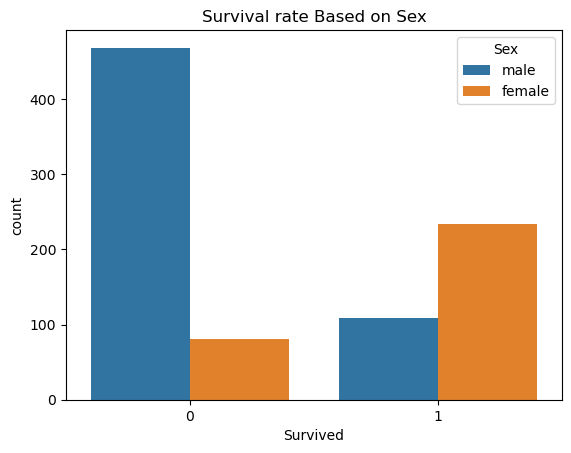

In [8]:
sns.countplot(data=df,x='Survived',hue='Sex');
plt.title("Survival rate Based on Sex");

## Survival Rate based on Age

In [9]:
def classify_age(value):
    if value<18:
        return 'child'
    elif value>=18 and value<=40:
        return 'adult'
    else:
        return "old"

df['age_group']=df.Age.apply(classify_age)


In [10]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,child
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.00,0,0,PC 17582,153.4625,C125,S,adult
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.00,1,0,347083,7.7750,NaN,S,adult


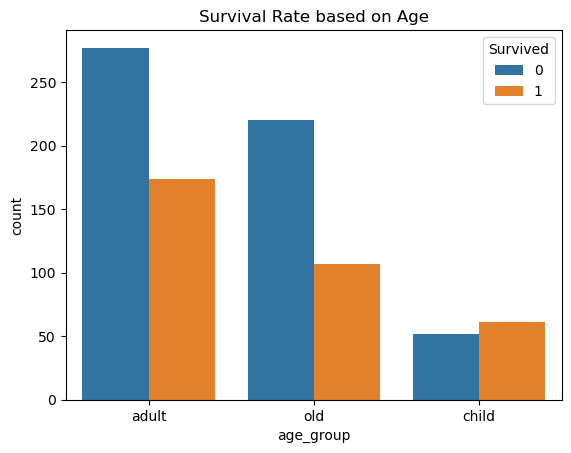

In [11]:
sns.countplot(data=df,x='age_group',hue='Survived');
plt.title("Survival Rate based on Age");

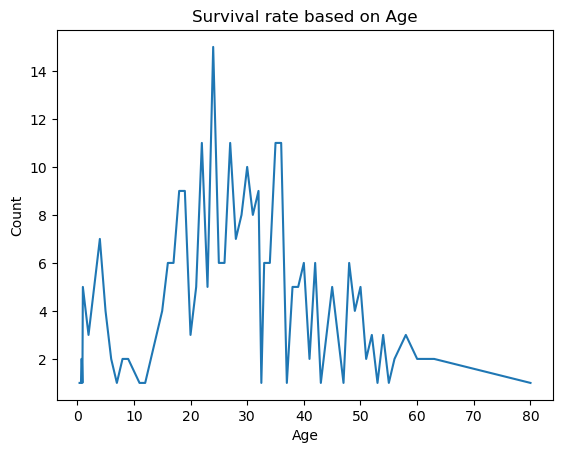

In [12]:
df[df.Survived==1].Age.value_counts().sort_index().plot();
plt.ylabel("Count");
plt.title("Survival rate based on Age");


## Survived rate based on fare

In [13]:
survived_df=df[df.Survived==1]
survived_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult


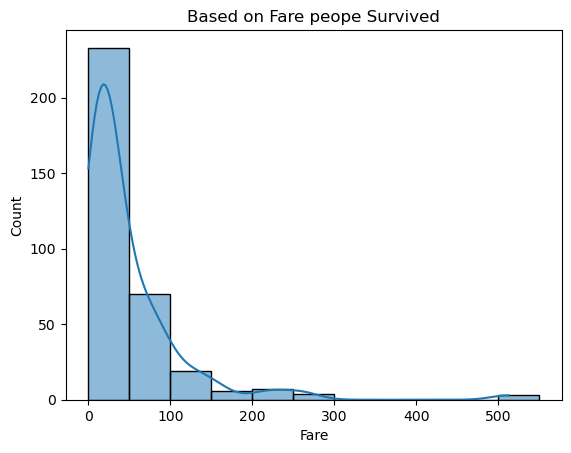

In [14]:
sns.histplot(data=survived_df,x='Fare',kde=True,binwidth=50);
plt.title("Based on Fare peope Survived");

## Based on Pclass

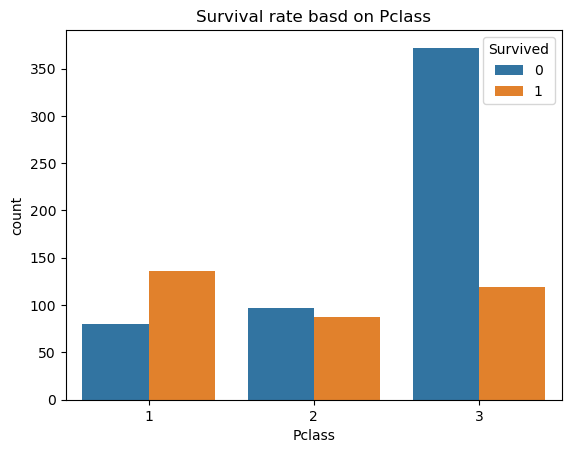

In [15]:
sns.countplot(data=df,x='Pclass',hue='Survived');
plt.title("Survival rate basd on Pclass");

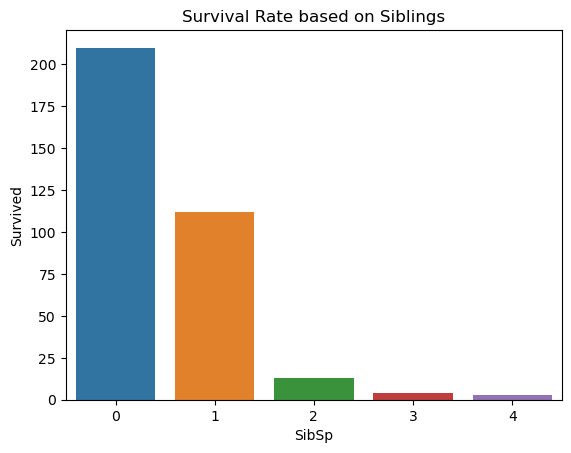

In [16]:
sibsp_df=df[df.Survived==1][['SibSp','Survived']].groupby("SibSp",as_index=False).Survived.count()
sns.barplot(data=sibsp_df,x='SibSp',y='Survived');
plt.title("Survival Rate based on Siblings");

# Data Processing for Model

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult


In [18]:
df.drop(['PassengerId','Name','Ticket',"Cabin","Age",'Embarked'],axis=1,inplace=True)

In [19]:
inputs=df.drop('Survived',axis=1)
targets=df.Survived

In [20]:
numeric_cols=inputs.select_dtypes(include='number').columns.tolist()
categorical_cols=inputs.select_dtypes(include='O').columns.tolist()


In [21]:
df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,age_group
0,0,3,male,1,0,7.2500,adult
1,1,1,female,1,0,71.2833,adult


## Imputer

In [22]:
inputs[numeric_cols].isna().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [23]:
inputs[categorical_cols].isna().sum()

Sex          0
age_group    0
dtype: int64

## Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(inputs[numeric_cols])

In [25]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])

## Encoder

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))


In [28]:
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])


In [29]:
X = inputs[numeric_cols + encoded_cols]
y=targets

## Split data

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Model Building

- After testing many model,i came up with Random Forest,which give me more suited for this kind of work

In [31]:
%%time
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 232 ms


RandomForestClassifier(n_jobs=-1)

# Evalution

In [32]:
importance_feature=pd.DataFrame({
    'features':X.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

importance_feature

,features,importance
3,Fare,0.391339
5,Sex_male,0.171156
4,Sex_female,0.148036
0,Pclass,0.105412
1,SibSp,0.068428
2,Parch,0.056130
7,age_group_child,0.030631
6,age_group_adult,0.014448
8,age_group_old,0.014422


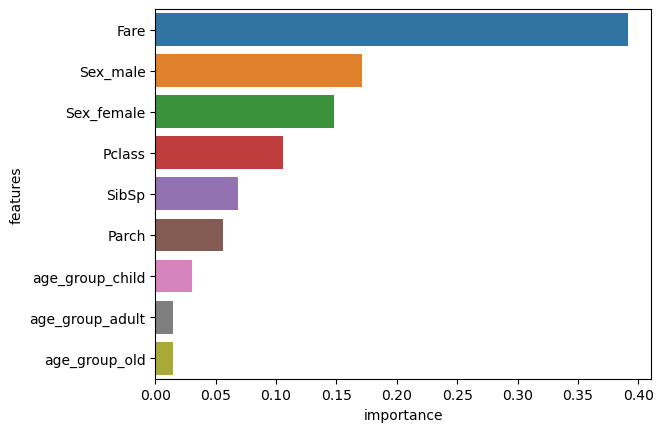

In [33]:
sns.barplot(data=importance_feature,x='importance',y='features');

In [34]:
from sklearn.metrics import mean_squared_error
def rmse(a,b):
    return mean_squared_error(a,b,squared=False)

In [35]:
preds=model.predict(X_test)

In [36]:
rmse(y_test,preds)

0.43398249639229447

### Accuracy

In [37]:
model.score(X_test,y_test)

0.8116591928251121

### Confusion Matrix

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

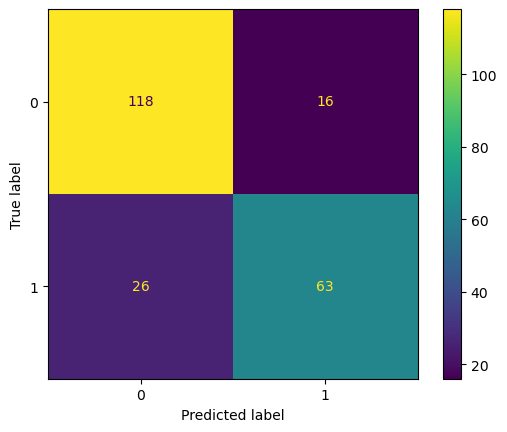

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,preds);